In [1]:
from kinematics.kinematics import KinematicsSolver
from joint_trajectories import SimpleJointSpaceTrajectory
from utils import acquire_trajectory_functions
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib

# Initialize solvers - kinematics and trajectory

In [2]:
# Wszystkie wartości translacji w metrach
# Translacja T1 - pomiędzy J1, a J2
t1 = np.array([0.05, 0, -0.035, 1])

# Translacja T2 - pomiędzy J2, a J3
t2 = np.array([0.09, 0, 0, 1])

# Translacja T3 - pomiędzy J3, a FCP
t3 = np.array([0.1, 0, 0, 1])

kinematics_solver = KinematicsSolver(t1, t2, t3, 0, -np.pi/2)
trajectory_generator = SimpleJointSpaceTrajectory(kinematics_solver)

# Generate trajectory

In [3]:
start_coordinates = np.array([0, -0.02, -0.15])
end_coordinates = np.array([0, 0.02, -0.135])

velocity_start = np.array([0, 0, 0])
velocity_end = np.array([0, 0, 0])
time_end = 3

coefficients = trajectory_generator.generate_trajectory(start_coordinates, end_coordinates, velocity_start, velocity_end, time_end)

In [4]:
# Timesteps - update leg's position with frequency F=20Hz (every 50ms)
x = np.arange(0, time_end, 0.05)

In [5]:
j_pos = []
j_vel = []
j_accel = []

for coeffs in coefficients:
    pos_poly, vel_poly, accel_poly = acquire_trajectory_functions(coeffs)
    
    j_pos.append(pos_poly)
    j_vel.append(vel_poly)
    j_accel.append(accel_poly)

# Show trajectory for Joint1

In [6]:
positions = j_pos[0](x)
positions_deg = [angle*180/np.pi for angle in positions]

vels = j_vel[0](x)

accels = j_accel[0](x)

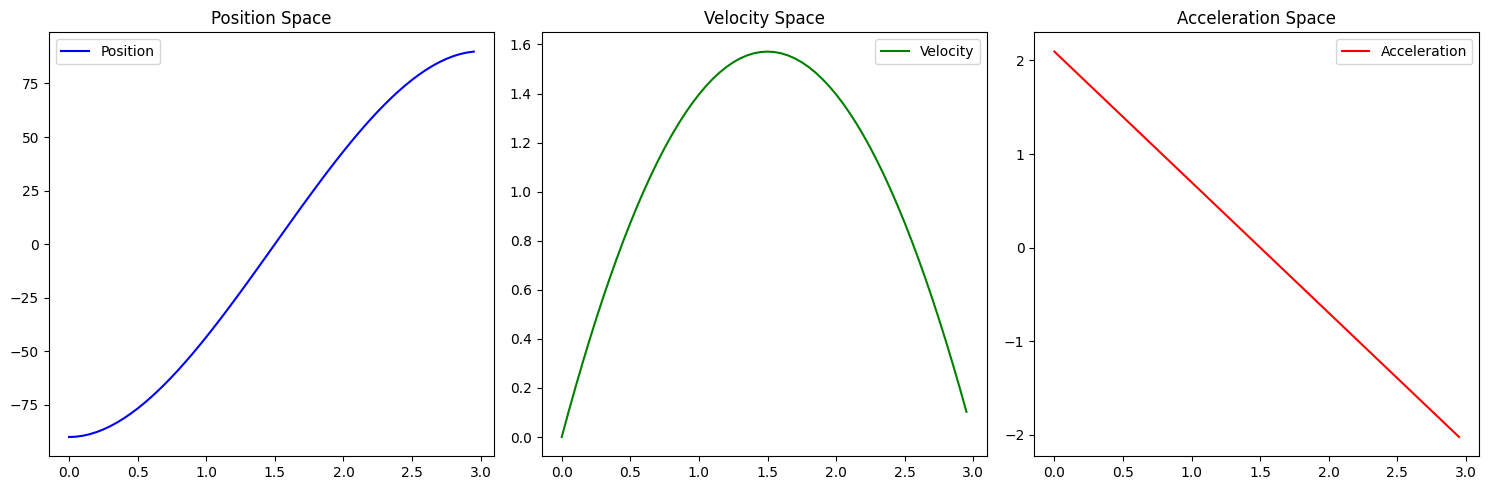

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on the first subplot
ax1.plot(x, positions_deg, label='Position', color='blue')
ax1.set_title('Position Space')
ax1.legend()

# Plot data on the second subplot
ax2.plot(x, vels, label='Velocity', color='green')
ax2.set_title('Velocity Space')
ax2.legend()

# Plot data on the third subplot
ax3.plot(x, accels, label='Acceleration', color='red')
ax3.set_title('Acceleration Space')
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Show trajectory of Foot Center Point in Cartesian coordinate system

In [8]:
x_points = []
y_points = []
z_points = []

theta1 = j_pos[0](x)
theta2 = j_pos[1](x)
theta3 = j_pos[2](x)
for i in range(len(x)):
    coordinates = kinematics_solver.forward(theta1[i], theta2[i], theta3[i])
    x_points.append(coordinates[0])
    y_points.append(coordinates[1])
    z_points.append(coordinates[2])

Text(0.5, 0, 'Z Axis')

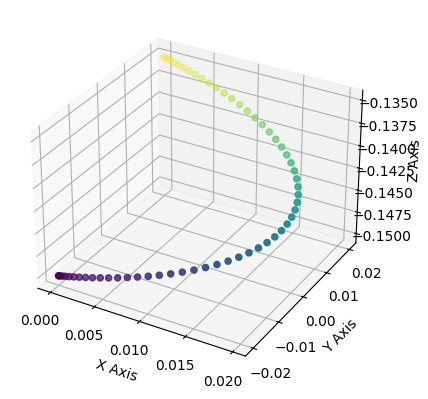

In [11]:
# Enable interactive plotting in PyCharm
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_points, y_points, z_points, c=z_points, marker='o')

# Add labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')